In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm

In [15]:
# TTE    BNP      MC.PA

In [16]:
df = pd.read_csv("TTE.csv")

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-27,52.369999,53.279999,52.230000,52.730000,48.599052,1703900
1,2022-06-28,53.639999,53.790001,52.840000,53.299999,49.124393,1409000
2,2022-06-29,54.540001,54.580002,52.950001,52.970001,48.820255,1607900
3,2022-06-30,52.389999,53.049999,51.889999,52.639999,48.516106,2092300
4,2022-07-01,52.549999,53.110001,51.500000,52.830002,48.691219,1799400


### Outliers

In [18]:
def find_outliers_iqr(data, column_name):
    # Calculate quartiles and IQR for the specified column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    return outliers

In [19]:
find_outliers_iqr(df , "Open")

,Date,Open,High,Low,Close,Adj Close,Volume


In [20]:
find_outliers_iqr(df , "High")

,Date,Open,High,Low,Close,Adj Close,Volume


In [21]:
find_outliers_iqr(df , "Low")

,Date,Open,High,Low,Close,Adj Close,Volume


In [22]:
find_outliers_iqr(df , "Close")

,Date,Open,High,Low,Close,Adj Close,Volume


In [23]:
find_outliers_iqr(df , "Adj Close")

,Date,Open,High,Low,Close,Adj Close,Volume


In [24]:
find_outliers_iqr(df , "Volume")

,Date,Open,High,Low,Close,Adj Close,Volume
40,2022-08-23,53.730000,54.810001,53.730000,54.730000,50.442368,3540600
44,2022-08-29,53.950001,54.860001,53.939999,54.439999,50.175091,3954900
45,2022-08-30,53.400002,53.410000,52.070000,52.070000,47.990757,4875300
48,2022-09-02,51.570000,52.040001,50.790001,50.840000,46.857113,3507100
49,2022-09-06,51.919998,52.040001,50.700001,50.750000,46.774174,3818500
50,2022-09-07,49.590000,49.959999,49.020000,49.560001,45.677399,3384900
65,2022-09-28,44.930000,46.480000,44.610001,46.220001,43.190601,3627500
71,2022-10-06,50.080002,50.880001,50.049999,50.709999,47.386314,3885800
77,2022-10-14,51.299999,51.380001,50.230000,51.000000,47.657303,4569100
113,2022-12-06,60.619999,60.950001,59.709999,60.119999,57.161587,3443900


In [25]:
def create_boxplot_with_outliers(data, column_name):
    # Finding outliers in the specified column
    outliers = find_outliers_iqr(data, column_name)

    # Creating a boxplot to visualize the specified column and its outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column_name])
    plt.title(f'Boxplot of "{column_name}" Column with Outliers')
    plt.ylabel('Values')
    plt.xlabel(column_name)
    plt.grid(True)

    # Highlighting outliers on the boxplot
    if not outliers.empty:
        plt.scatter(outliers.index + 1, outliers[column_name], color='red', label='Outliers')
        plt.legend()

    plt.show()

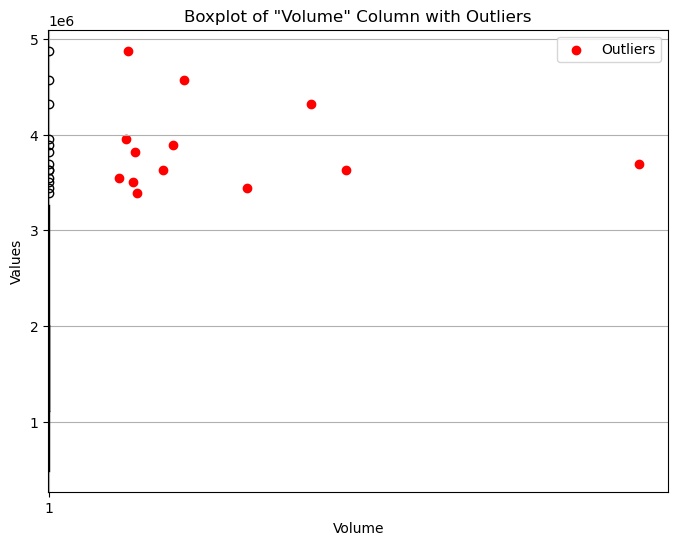

In [26]:
create_boxplot_with_outliers(df , "Volume")

## Missing Values

In [27]:
rows_with_na = df[df.isna().any(axis=1)]

print("Rows with empty or NA cells:")
print(rows_with_na)

Rows with empty or NA cells:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


# Exploratory Data Analysis

In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,378.000000,378.000000,378.000000,378.000000,378.000000,3.780000e+02
mean,59.528333,59.966217,59.026693,59.471905,57.510298,1.631715e+06
std,5.862799,5.793334,5.856364,5.800514,6.939748,7.285416e+05
min,44.930000,45.820000,44.610001,44.860001,41.919743,4.876000e+05
25%,56.000001,56.415001,55.315000,56.179999,53.605126,1.114625e+06
50%,60.580000,60.995001,60.264999,60.584999,58.654394,1.420600e+06
75%,63.820000,64.307499,63.237501,63.799999,62.115852,2.006975e+06
max,69.250000,69.510002,68.959999,68.970001,68.970001,4.875300e+06


In [82]:
def visualize_histogram(data, column_name):
    plt.figure(figsize=(6, 4))
    plt.hist(data[column_name])
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of "{column_name}" Column')
    plt.tight_layout()
    plt.show()

    
def visualize_boxplot(data, column_name):
    plt.figure(figsize=(6, 8))
    plt.boxplot(data[column_name])
    plt.title(f'Boxplot of "{column_name}" Column')
    plt.ylabel('Values')
    plt.xlabel(column_name)
    plt.show()
    
    
def visualize_time_series(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column])
    plt.title(f'{y_column} over {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

def visualize_column_correlation(data, column_name):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    numeric_columns = numeric_columns.drop(column_name)
    correlations = data[numeric_columns].corrwith(data[column_name])
    corr_df = pd.DataFrame({'Correlation': correlations})
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    
    cmap = np.random.choice(plt.colormaps())
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[corr_df.index].corr(), annot=True, cmap=cmap, fmt='.2f')
    plt.title(f'Correlation Heatmap of {column_name} with Numeric Columns')
    plt.show()

In [57]:
# Open

In [72]:
df["Open"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 378 entries, 0 to 377
Series name: Open
Non-Null Count  Dtype  
--------------  -----  
378 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


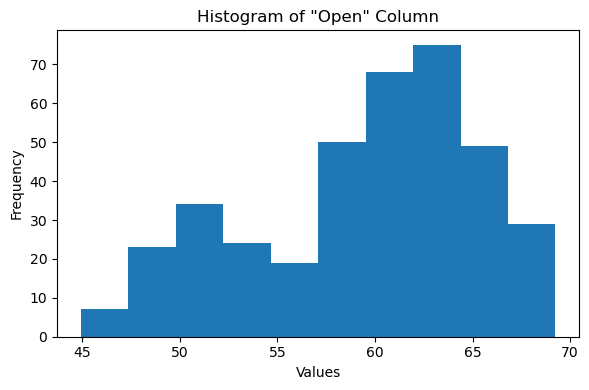

In [58]:
visualize_histogram(df, "Open")

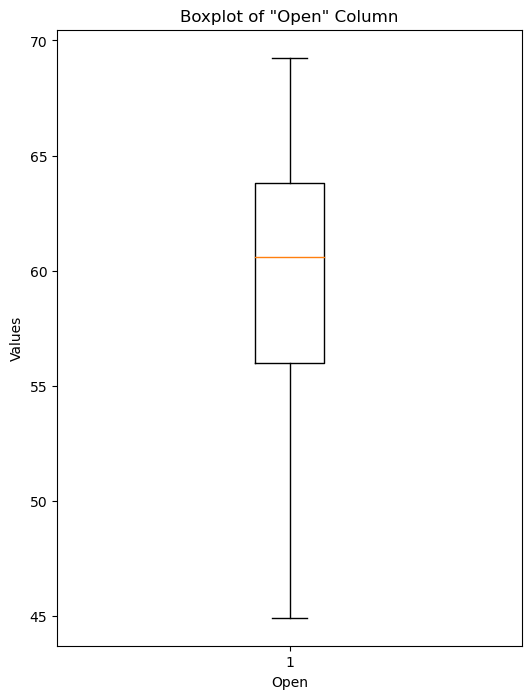

In [59]:
visualize_boxplot(df , "Open")

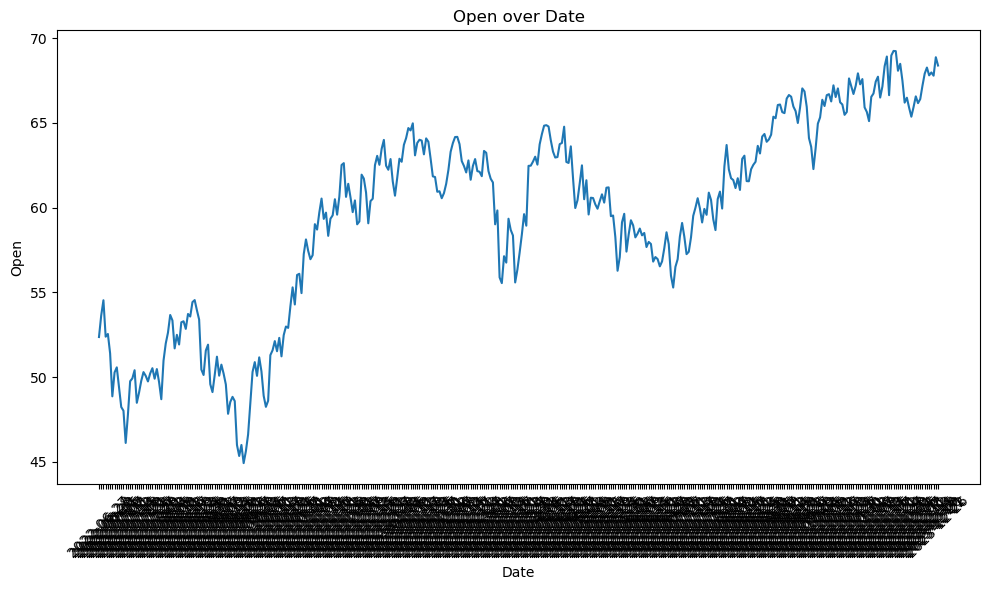

In [64]:
visualize_time_series(df , "Date" , "Open")

In [62]:
oldest_date = df['Date'].min()
newest_date = df['Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2022-06-27
Newest Date: 2023-12-26


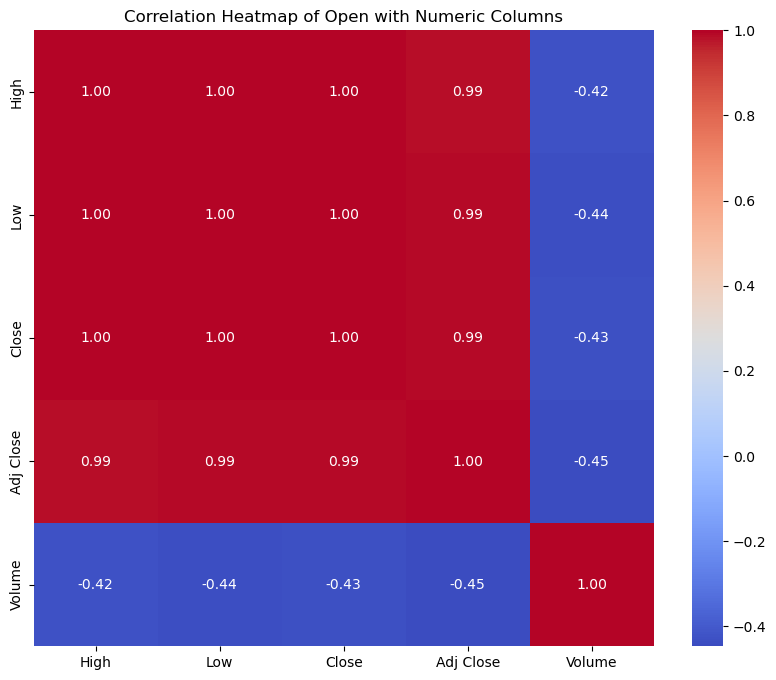

In [75]:
visualize_column_correlation(df , "Open")

In [31]:
# High

In [76]:
df["High"].describe()

count    378.000000
mean      59.966217
std        5.793334
min       45.820000
25%       56.415001
50%       60.995001
75%       64.307499
max       69.510002
Name: High, dtype: float64

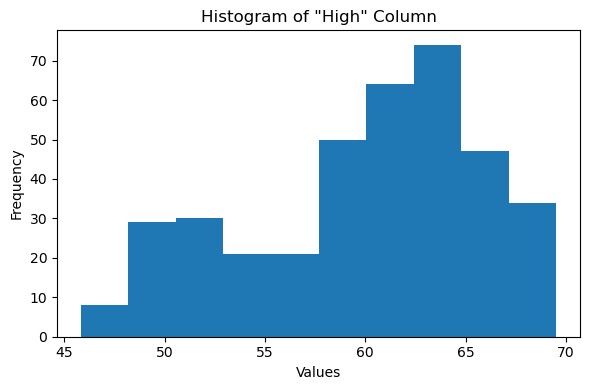

In [77]:
visualize_histogram(df, "High")

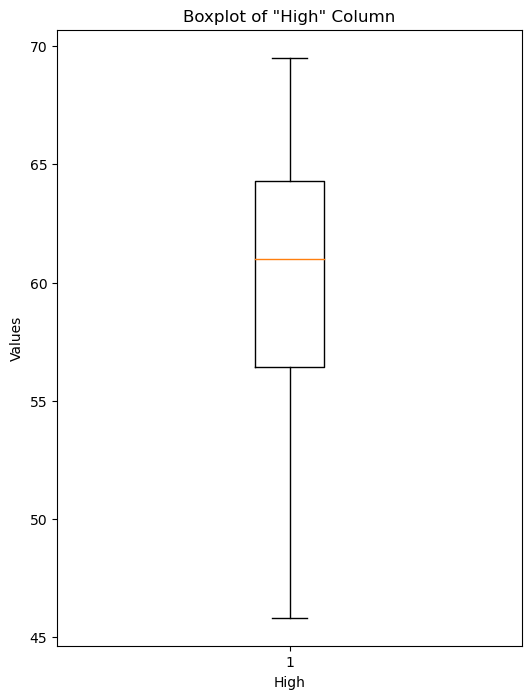

In [78]:
visualize_boxplot(df , "High")

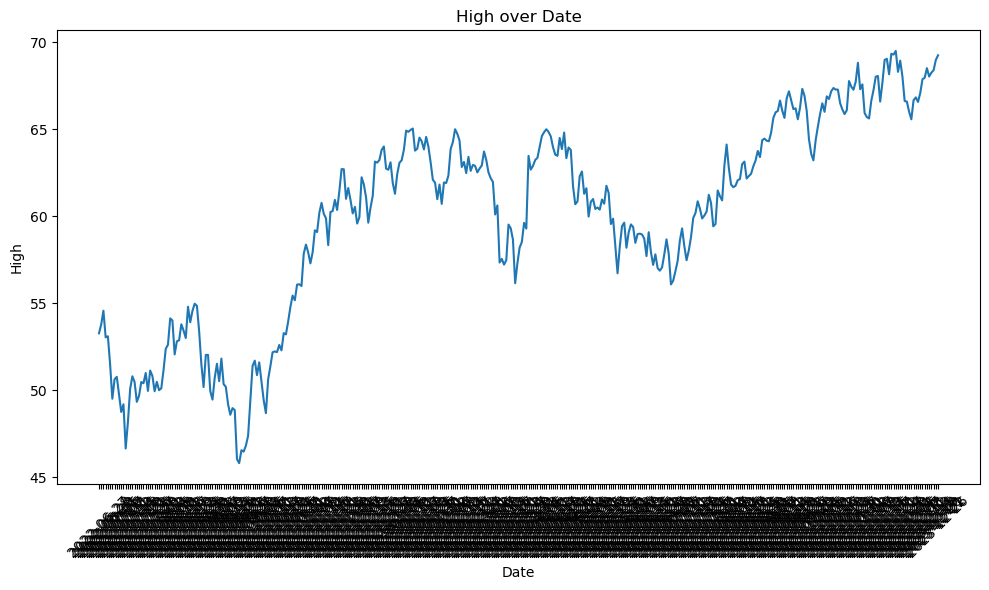

In [79]:
visualize_time_series(df , "Date" , "High")

In [80]:
oldest_date = df['Date'].min()
newest_date = df['Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2022-06-27
Newest Date: 2023-12-26


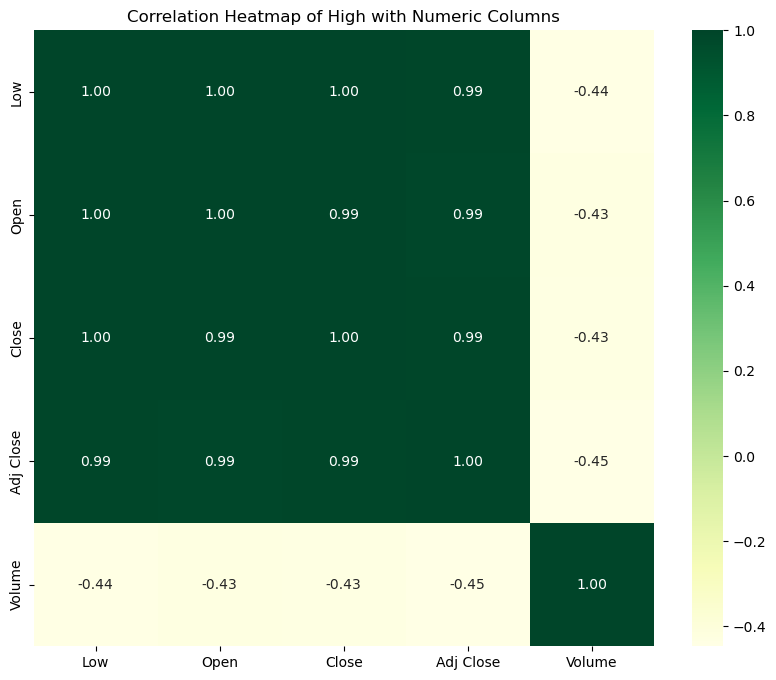

In [83]:
visualize_column_correlation(df , "High")

In [32]:
# Low

In [84]:
df["Low"].describe()

count    378.000000
mean      59.026693
std        5.856364
min       44.610001
25%       55.315000
50%       60.264999
75%       63.237501
max       68.959999
Name: Low, dtype: float64

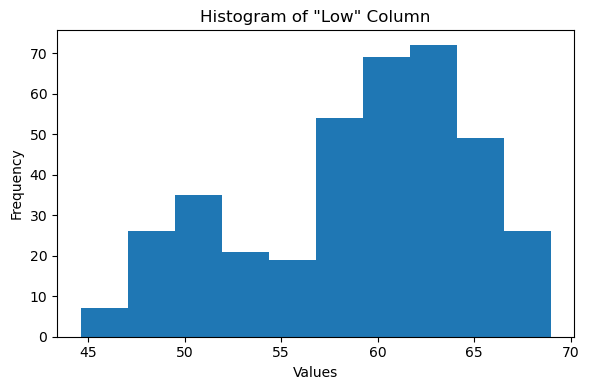

In [85]:
visualize_histogram(df, "Low")

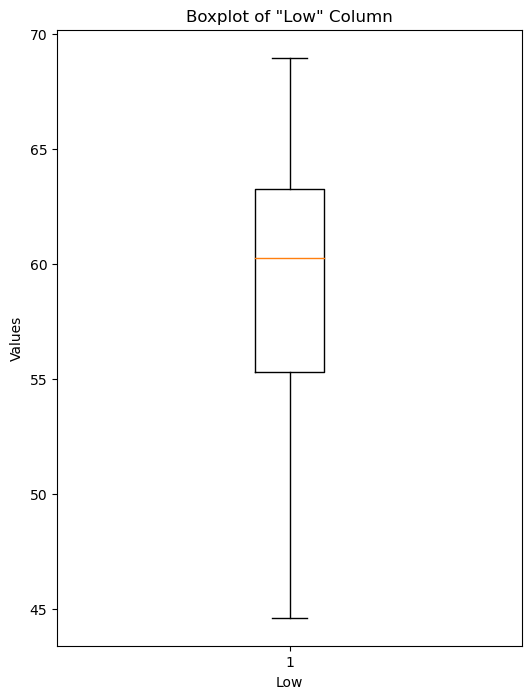

In [86]:
visualize_boxplot(df , "Low")

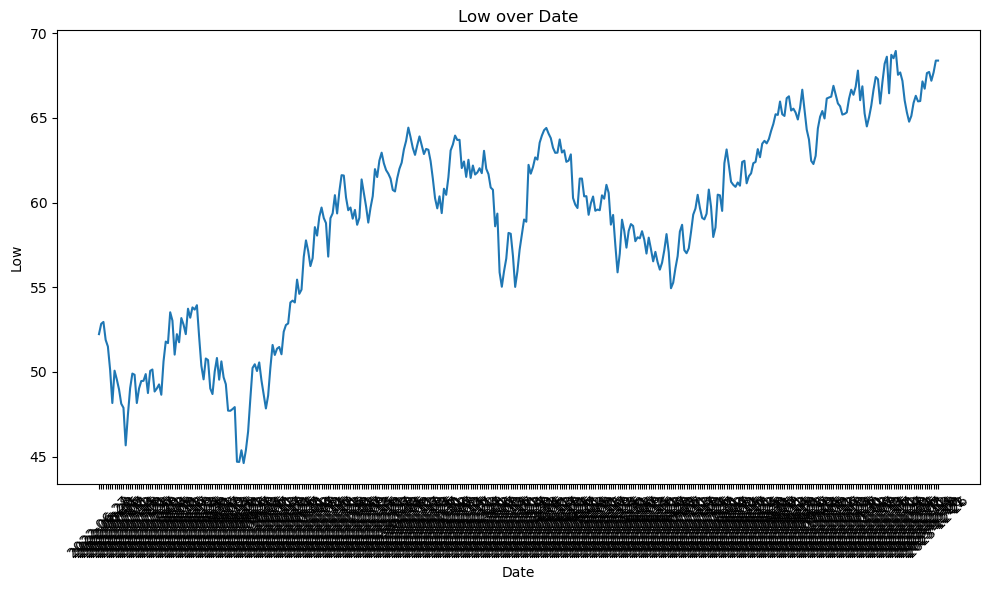

In [87]:
visualize_time_series(df , "Date" , "Low")

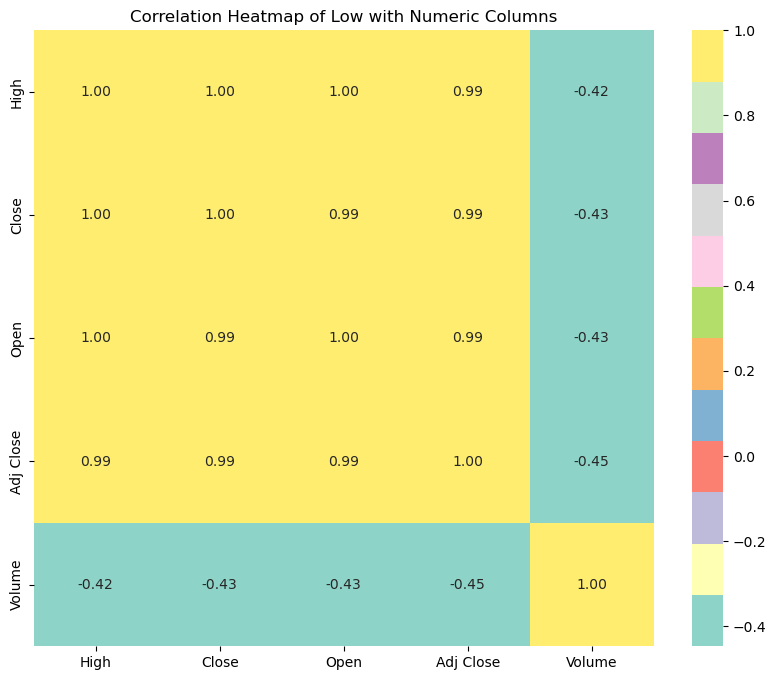

In [89]:
visualize_column_correlation(df , "Low")

In [33]:
# Close

In [90]:
df["Close"].describe()

count    378.000000
mean      59.471905
std        5.800514
min       44.860001
25%       56.179999
50%       60.584999
75%       63.799999
max       68.970001
Name: Close, dtype: float64

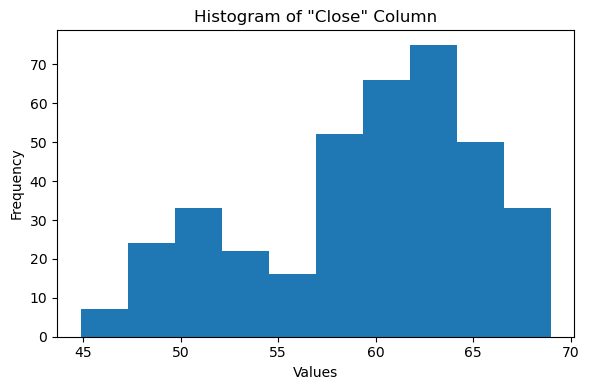

In [92]:
visualize_histogram(df, "Close")

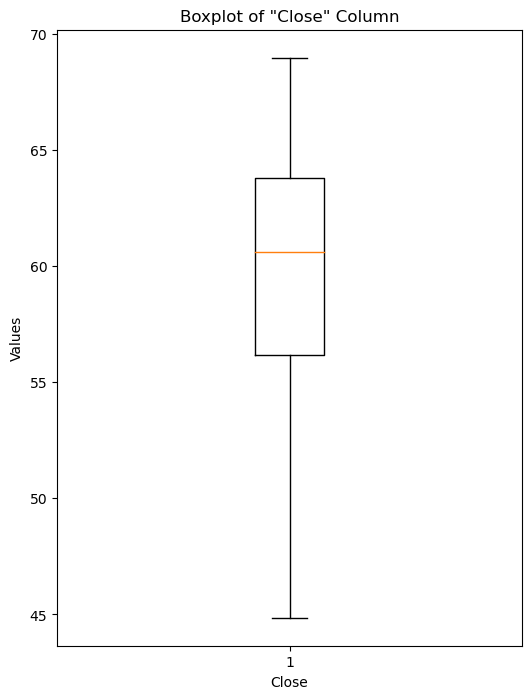

In [93]:
visualize_boxplot(df , "Close")

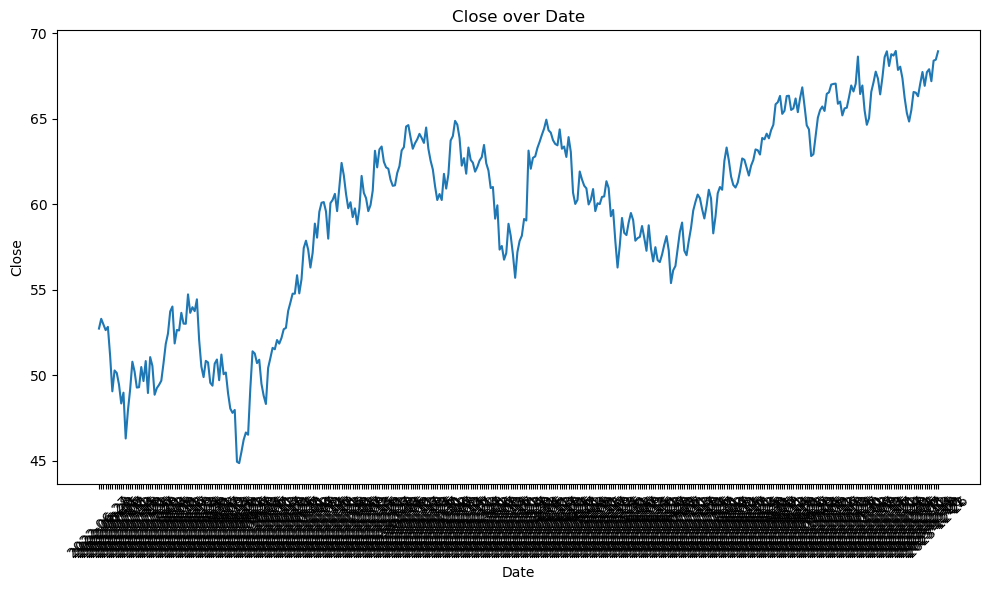

In [94]:
visualize_time_series(df , "Date" , "Close")

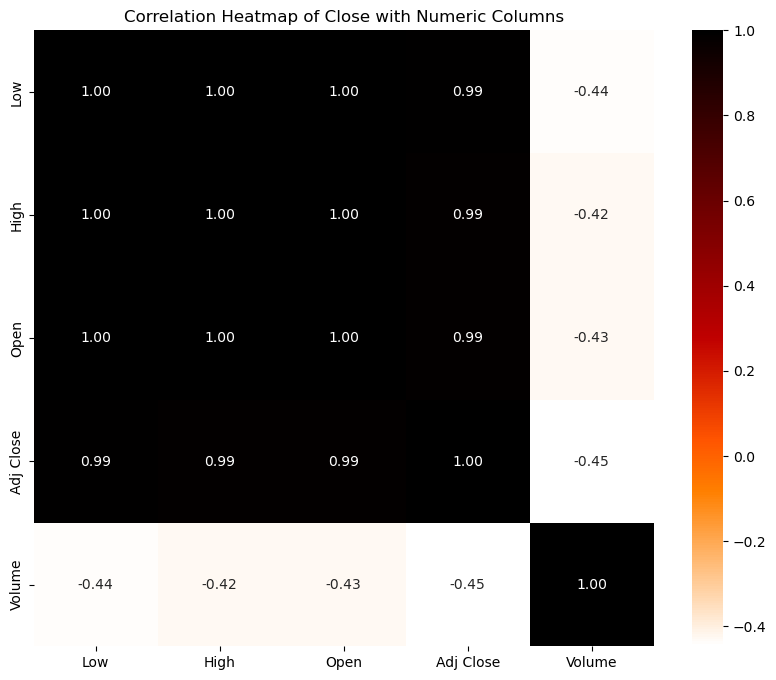

In [99]:
visualize_column_correlation(df , "Close")

In [34]:
# Adj Close

In [101]:
df["Adj Close"].describe()

count    378.000000
mean      57.510298
std        6.939748
min       41.919743
25%       53.605126
50%       58.654394
75%       62.115852
max       68.970001
Name: Adj Close, dtype: float64

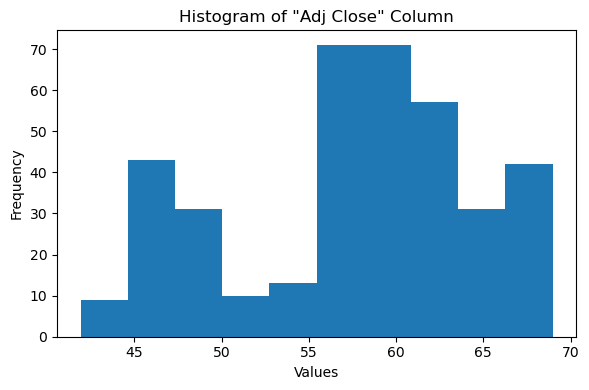

In [100]:
visualize_histogram(df, "Adj Close")

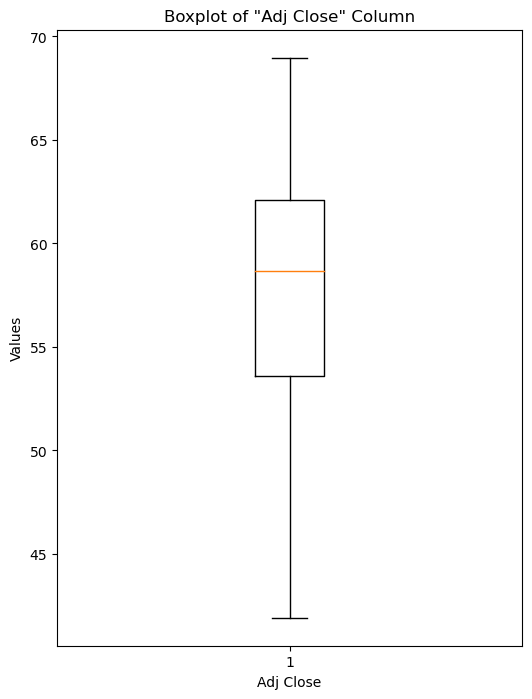

In [102]:
visualize_boxplot(df , "Adj Close")

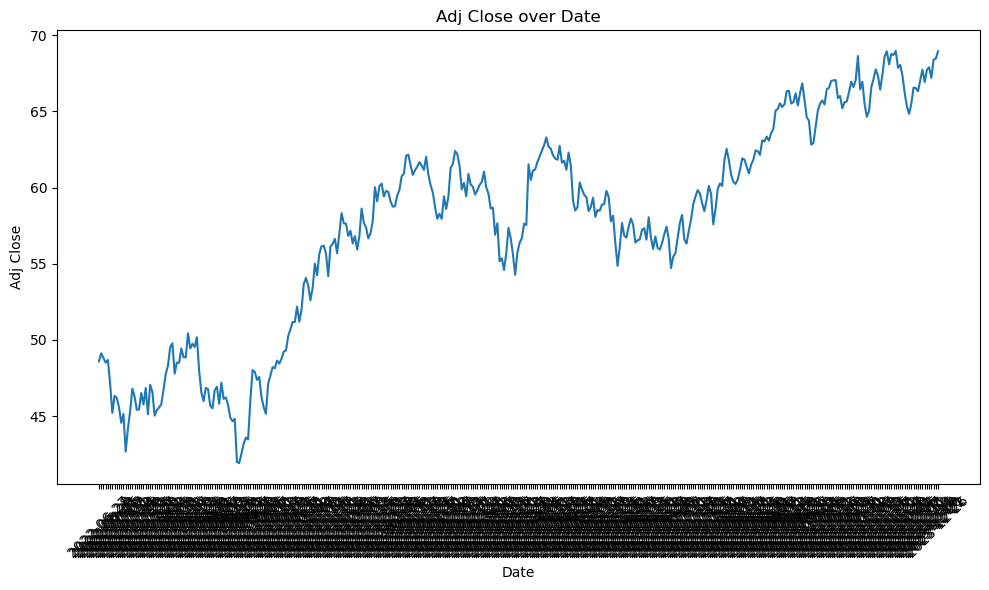

In [103]:
visualize_time_series(df , "Date" , "Adj Close")

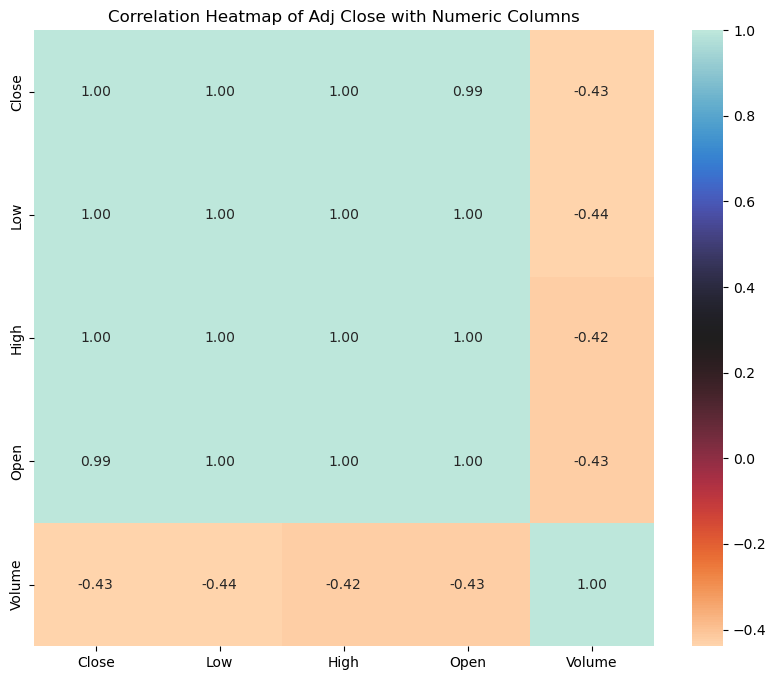

In [104]:
visualize_column_correlation(df , "Adj Close")

In [35]:
# Volume

In [105]:
df["Volume"].describe()

count    3.780000e+02
mean     1.631715e+06
std      7.285416e+05
min      4.876000e+05
25%      1.114625e+06
50%      1.420600e+06
75%      2.006975e+06
max      4.875300e+06
Name: Volume, dtype: float64

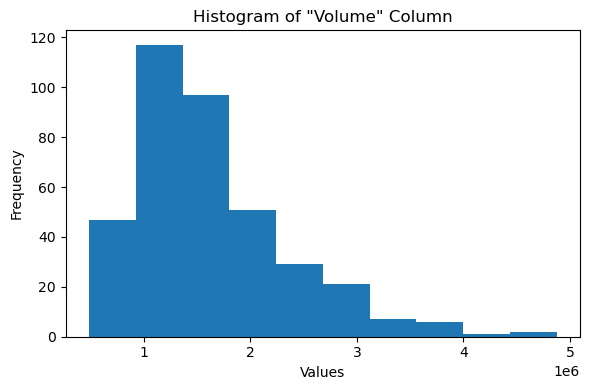

In [106]:
visualize_histogram(df, "Volume")

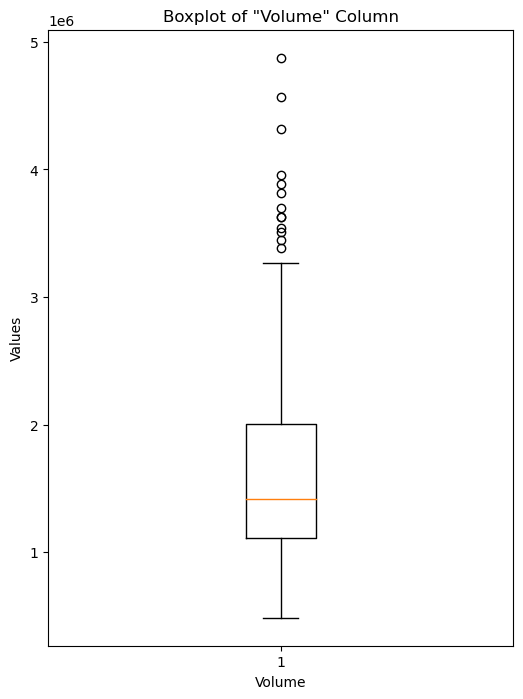

In [107]:
visualize_boxplot(df , "Volume")

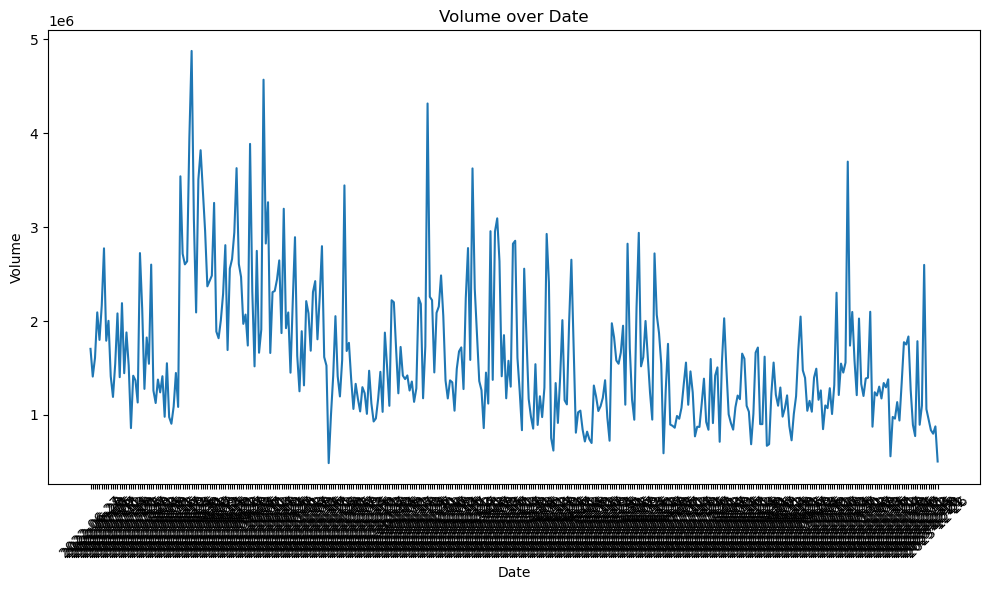

In [108]:
visualize_time_series(df , "Date" , "Volume")

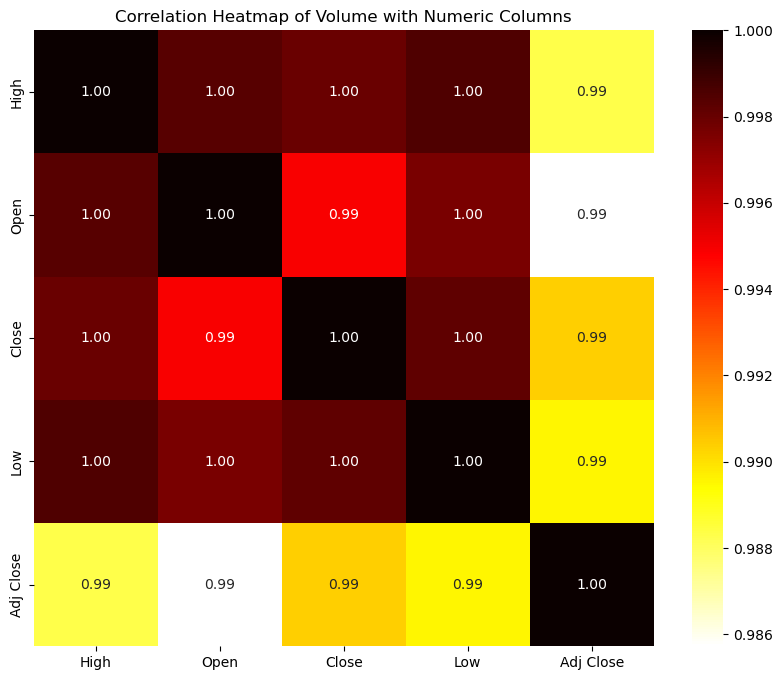

In [115]:
visualize_column_correlation(df , "Volume")

## Varience

In [117]:
def calculate_column_variance(data, column_name):
    column_variance = data[column_name].var()
    return column_variance

def calculate_column_covariance(data, column):
    numeric_columns = data.select_dtypes(include=[np.number]).columns.drop(column)
    covariances = {col: data[[column, col]].cov().iloc[0, 1] for col in numeric_columns}
    print(f"Covariance of '{column}' with other columns:")
    for col, cov in covariances.items():
        print(f"{col}: {cov:.4f}")

In [119]:
# Open

In [118]:
calculate_column_variance(df , "Open")

34.37240722253098

In [121]:
calculate_column_covariance(df , "Open")

Covariance of 'Open' with other columns:
High: 33.9089
Low: 34.2534
Close: 33.8345
Adj Close: 40.1054
Volume: -1826645.1249


In [122]:
# High

In [127]:
calculate_column_variance(df , "High")

33.56271939379903

In [128]:
calculate_column_covariance(df , "High")

Covariance of 'High' with other columns:
Open: 33.9089
Low: 33.8774
Close: 33.5363
Adj Close: 39.7350
Volume: -1793548.7037


In [123]:
# Low

In [129]:
calculate_column_variance(df , "Low")

34.2969978265131

In [130]:
calculate_column_covariance(df , "Low")

Covariance of 'Low' with other columns:
Open: 34.2534
High: 33.8774
Close: 33.9082
Adj Close: 40.2161
Volume: -1873749.3078


In [124]:
# Close

In [131]:
calculate_column_variance(df , "Close")

33.645964340161434

In [132]:
calculate_column_covariance(df , "Close")

Covariance of 'Close' with other columns:
Open: 33.8345
High: 33.5363
Low: 33.9082
Adj Close: 39.8662
Volume: -1834568.0339


In [125]:
# Adj Close

In [133]:
calculate_column_variance(df , "Adj Close")

48.160107391687895

In [134]:
calculate_column_covariance(df , "Adj Close")

Covariance of 'Adj Close' with other columns:
Open: 40.1054
High: 39.7350
Low: 40.2161
Close: 39.8662
Volume: -2260693.9480


In [126]:
# Volume

In [135]:
calculate_column_variance(df , "Volume")

530772834405.84985

In [136]:
calculate_column_covariance(df , "Volume")

Covariance of 'Volume' with other columns:
Open: -1826645.1249
High: -1793548.7037
Low: -1873749.3078
Close: -1834568.0339
Adj Close: -2260693.9480


# Beta 

In [137]:
def calculate_beta(data):
    stock_returns = data['Close']
    market_returns = data['Open']
    beta = np.cov(market_returns, stock_returns, ddof=0)[0][1] / np.var(market_returns, ddof=0)
    return beta

In [138]:
calculate_beta(df)

0.9843505934802481

# Cac40 Index Hedge

In [142]:
def calculate_cac40_hedge(data):
    cac40_index = data[['Open']].mean(axis=1)
    beta = np.cov(cac40_index, data['Open'], ddof=0)[0][1] / np.var(cac40_index, ddof=0)
    return beta

In [143]:
calculate_cac40_hedge(df)

1.0000000000000016

# Value at Risk

## Portfolio VaR

In [162]:
def calculate_equal_weighted_portfolio_var(df, confidence_level=0.95):
    stock_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
    num_assets = 1  # As 'stock_returns' is a Series, set the number of assets to 1
    
    weights = np.array([1 / num_assets])
    portfolio_variance = np.dot(weights.T, np.dot(stock_returns.var(), weights))

    portfolio_volatility = np.sqrt(portfolio_variance)
    alpha = 1 - confidence_level
    portfolio_var = norm.ppf(alpha) * portfolio_volatility * np.sqrt(1)
    
    return portfolio_var


def calculate_single_stock_var(df, confidence_level=0.95):
    stock_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
    
    var_values = {}
    stock_variance = np.var(stock_returns)
    stock_volatility = np.sqrt(stock_variance)
    
    alpha = 1 - confidence_level
    stock_var = norm.ppf(alpha) * stock_volatility * np.sqrt(1)
        
    var_values['Close'] = stock_var  # Assign the VaR value to the 'Close' key
    
    return var_values

In [163]:
calculate_equal_weighted_portfolio_var(df)

-0.027868829935169852

## Single Stocks VaR

In [164]:
calculate_single_stock_var(df)

{'Close': -0.027831844079543214}

# HeatMap

In [176]:
def create_heatmap(data):
    numeric_data = data.select_dtypes(include=np.number)
#     plt.figure(figsize=(10000, 10000))
    sns.heatmap(numeric_data, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Heatmap of Numeric DataFrame Columns')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

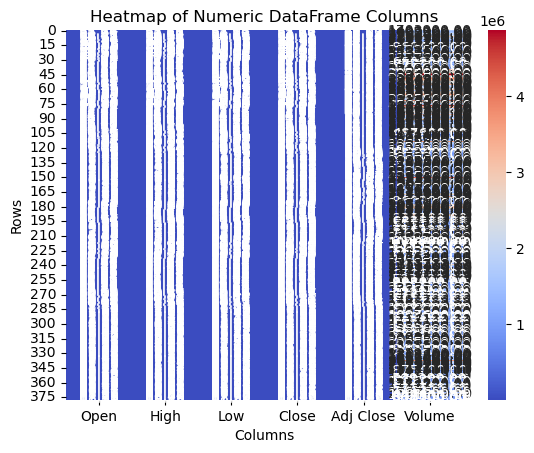

In [177]:
create_heatmap(df)